In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
img = cv2.imread('lena.png',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

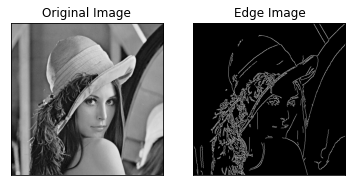

In [ ]:
img = cv2.imread('lena.png',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

Countour

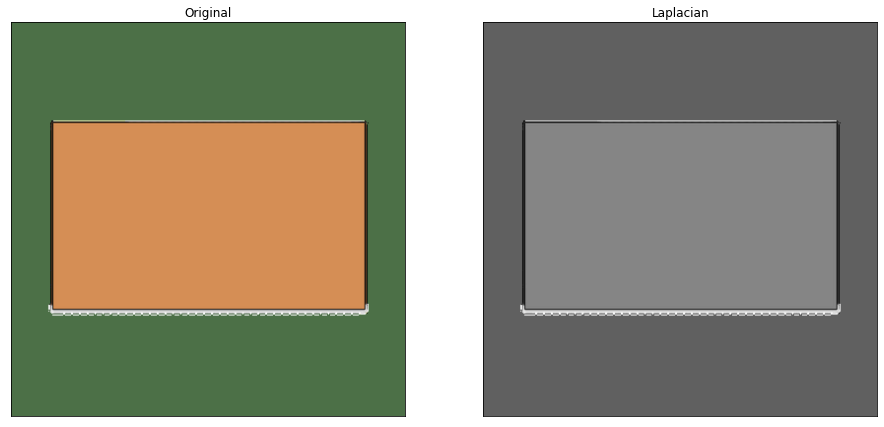

In [ ]:
img = cv2.imread('rec.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(imgray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(img)
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap='gray')
plt.title('Laplacian'),plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img0 = img.copy()
img1 = img.copy()
img0 = cv2.drawContours(img, contours, 2, (255,0,0), 3)
img1 = cv2.drawContours(img, contours, 3, (255,0,0), 3)

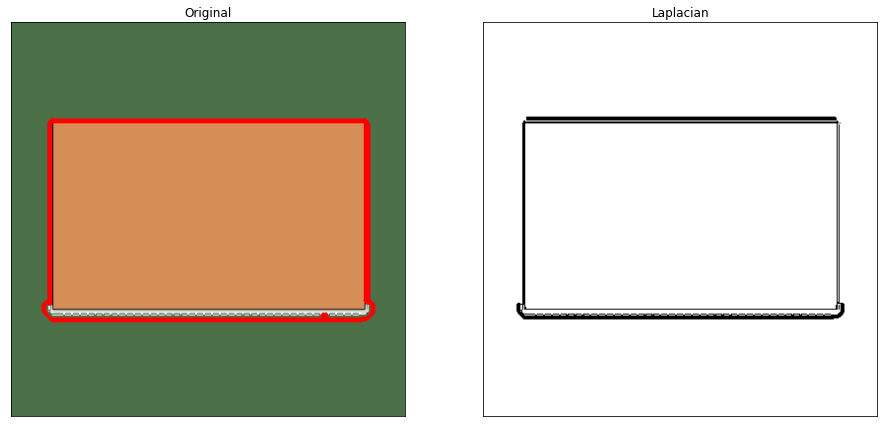

In [ ]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(img)
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2),plt.imshow(thresh,cmap='gray')
plt.title('Laplacian'),plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
cnt = contours[2]
M = cv2.moments(cnt)
print(M)

In [ ]:
cx = int(M['m10']/M['m00']) # 무게중심
cy = int(M['m01']/M['m00'])
area = cv2.contourArea(cnt) # 면적
perimeter = cv2.arcLength(cnt,True) # 길이
epsilon = 0.1*cv2.arcLength(cnt,True) # 근사치
approx = cv2.approxPolyDP(cnt,epsilon,True) 


In [ ]:
print(approx)

[[[342 463]]

 [[343 462]]

 [[344 463]]

 [[343 464]]]


In [ ]:
print(area, perimeter)

2.0 5.656854152679443


In [ ]:
img = cv2.rectangle(img, (cx-2, cy-2), (cx+2, cy+2), (0, 0, 255), 2)
img1 = cv2.drawContours(img, approx, -1, (255,0,0), 3)

TypeError: Image data of dtype object cannot be converted to float

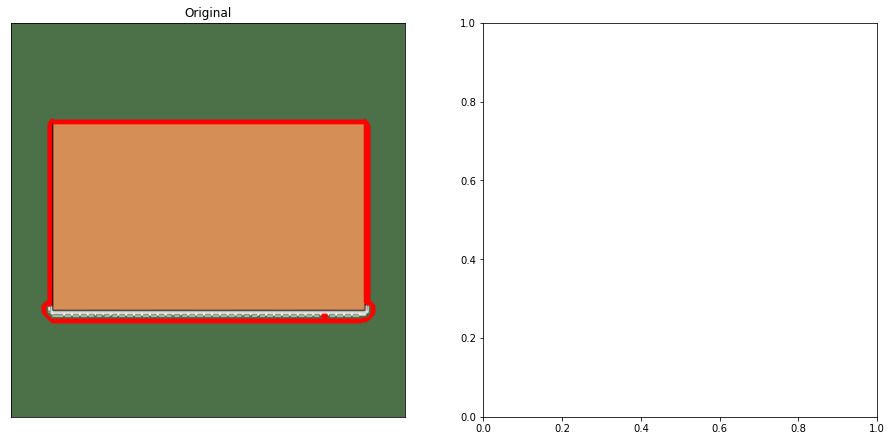

In [ ]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(img0)
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img1,cmap='gray')
plt.title('Laplacian'),plt.xticks([]),plt.yticks([])
plt.show()

(Text(0.5, 1.0, 'Laplacian'), ([], []), ([], []))

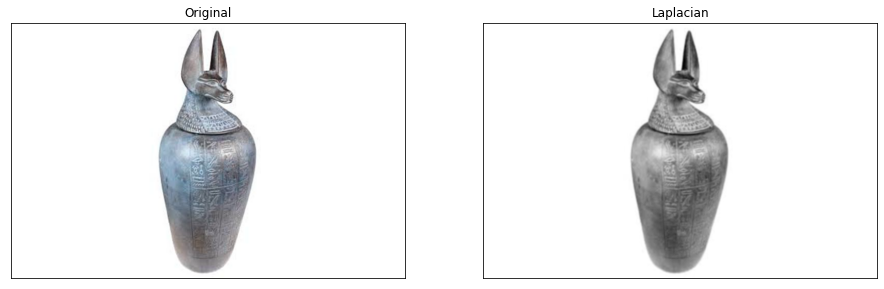

In [5]:
im1 = cv2.imread('jar.jpg')
imgray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(imgray,(5,5),0)
ret, thresh = cv2.threshold(imgray,100,255,0)
#thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, #cv2.THRESH_BINARY, 11, 2)
 
kernel = np.ones((5,5),np.uint8)
#erosion = cv2.erode(img,kernel,iterations = 1)
#dilation = cv2.dilate(img,kernel,iterations = 1)
#opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
#closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
 
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im1)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

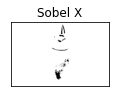

In [6]:
plt.subplot(1,3,3),plt.imshow(thresh,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
hull = cv2.convexHull(cnt)

In [ ]:
x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

In [ ]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
im = cv2.drawContours(im,[box],0,(0,0,255),2)

In [ ]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = cv2.circle(img,center,radius,(0,255,0),2)

In [ ]:
perimeter = cv2.arcLength(cnt,True)

In [ ]:
area = cv2.contourArea(cnt)